In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
%matplotlib inline

# RandomForestClassifier
官网链接： https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
```python
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
```

- n_estimators : 基评估器，对精确性的影响是单调的，该值越大，模型的效果往往越好

In [7]:
# 导入数据集
wine = load_wine();
wine_data = pd.concat([pd.DataFrame(wine.data,columns = wine.feature_names),pd.DataFrame(wine.target,columns = ['target'])],axis = 1)
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
wine_data['target'].unique().tolist()

[0, 1, 2]

In [18]:
# 实例化
# 训练集带入实例化后的模型去进行训练，使用的接口是fit
# 使用其他接口将测试集倒入我们训练好的模型，去获取我们希望获取的结果 score

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size = 0.4);

In [20]:
clf = DecisionTreeClassifier(random_state = 20);
rfc = RandomForestClassifier(random_state = 20);

clf = clf.fit(Xtrain, Ytrain);
rfc = rfc.fit(Xtrain, Ytrain);

score_c = clf.score(Xtest, Ytest);
score_r = rfc.score(Xtest, Ytest);

print("single Tree:{}".format(score_c)
     ,"Random Forest:{}".format(score_r))

single Tree:0.9444444444444444 Random Forest:1.0


In [26]:
# 交叉验证
clf = DecisionTreeClassifier(random_state = 20);
rfc = RandomForestClassifier(random_state = 20, n_estimators = 50);
score_c = cross_val_score(clf,wine.data,wine.target,cv = 10);
score_r = cross_val_score(rfc,wine.data,wine.target,cv = 10);
print("single Tree:{}".format(score_c.mean())
     ,"Random Forest:{}".format(score_r.mean()))

single Tree:0.865032679738562 Random Forest:0.9833333333333332


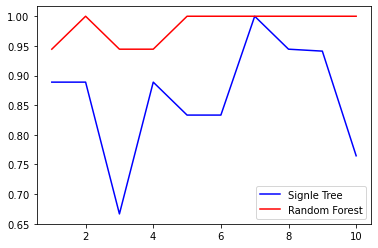

In [28]:
plt.plot(range(1,11),score_c,label = 'Signle Tree', color = 'blue');
plt.plot(range(1,11),score_r,label = 'Random Forest', color = 'red');
plt.legend();
plt.show()


RandomForest:0.9722
DecisionTree:0.9


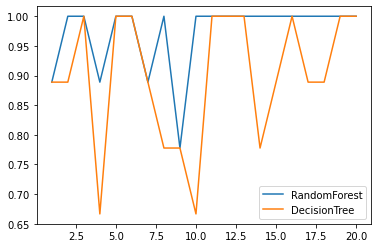

In [38]:
label = ['RandomForest','DecisionTree']
models = [rfc,clf]
for idx,model in enumerate(models):
    score = cross_val_score(model,wine.data,wine.target,cv = 20);
    print("{}:{}".format(label[idx],round(score.mean(),4)));
    plt.plot(range(1,21),score,label = label[idx]);
    plt.legend();

0.9888888888888889 60


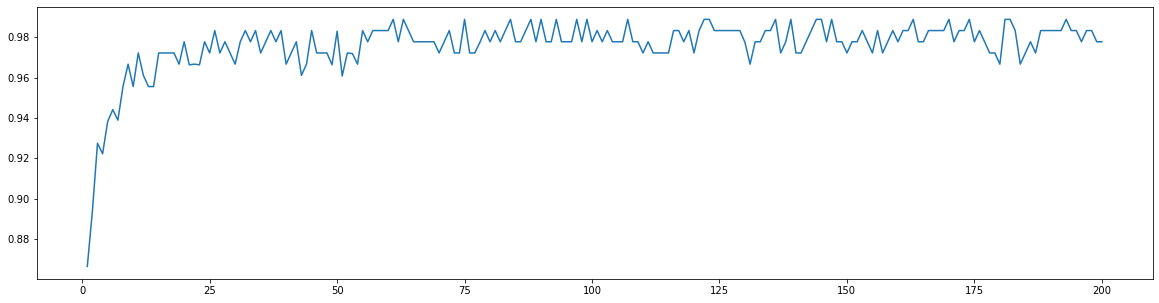

In [41]:
# n_estimator学习曲线
superpa = [];
for i in range(200):
    rfc = RandomForestClassifier(n_estimators = i+1, n_jobs = -1);
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean();
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)));
plt.figure(figsize = [20,5]);
plt.plot(range(1,201),superpa)
plt.show()

随机森林本质时bagging继承算法，袋装集成算法对基评估器的预测结果进行平均或少数服从多数的原则来决定集成评估器的结果
$$
error_{random_forest} = \sum_{i=13}^{25} C_{25}^i \alpha^i(1-\alpha)^{25-i} 
$$

其中$\alpha$代表单个决策树的判断错误的概率， i代表判断错误的决策树的个数 ， 假设25颗树，上述公式为随机森林判断错误的概率

In [44]:
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [48]:
# 随机森林的重要属性： estimators_，查看森林中树的状况
# 随机森林实例化中random_state是用于固定森林的形成格式；中间的每一颗树的random_state时不同的
# random_state的局限性： 当需要成千上万颗树的时候，数据不一定能够提供成千上万的特征来构建尽量多的树
rfc = RandomForestClassifier(n_estimators = 25, random_state = 2)
rfc = rfc.fit(Xtrain,Ytrain);
print(rfc.score(Xtest,Ytest));
rfc.estimators_

0.9861111111111112


[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [49]:
rfc.estimators_[0].random_state

1872583848

In [54]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


### bootstrap && oob_score 
要让基分类器尽量都不一样，一种很容易理解的方法是使用不同的训练集来进行训练，而袋装法正是通过有放回的随机抽样技术来形成不同的训练数据，bootstrap就是用来控制抽样技术的参数
bootstrap = True ，代表采用这种有放回的随机抽样技术
一般来说，自助集大约平均包含63%的原始数据，因为每一个样本被抽到某个数据集中的概率为：
$$
1 - (1-\frac{1}{n})^n
$$
当n足够大的时候，约等于0.632；因此，会有约37%的训练数据会被浪费掉，这些数据被称作袋外数据（out of bag data）
这些数据可以用于作为集成算法的测试集；
如果希望用袋外数据作为测试，实例化的时候将oob_score 调整为True， 训练完毕后，用随机森林的重要属性 oob_score_来查看我们在袋外数据上的测试结果

In [55]:
# bootstrap, oob_score
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 20, bootstrap = True, oob_score = True);
rfc = rfc.fit(wine.data, wine.target)
rfc.oob_score_

0.9831460674157303

In [57]:
# 属性与接口
rfc = RandomForestClassifier(n_estimators = 60);
rfc = rfc.fit(Xtrain,Ytrain);
print(rfc.score(Xtest,Ytest));
print(rfc.feature_importances_);
print(rfc.apply(Xtest));
print(rfc.predict(Xtest));
print(rfc.predict_proba(Xtest));

1.0
[0.14460501 0.04610053 0.01074736 0.03606965 0.02664868 0.06373105
 0.13920913 0.01181293 0.03368011 0.16559861 0.05790882 0.10227177
 0.16161635]
[[ 9  9  5 ... 14 12  8]
 [12  9  5 ...  9 14 11]
 [12  9  5 ...  9 14 17]
 ...
 [ 8  3  3 ...  4  5 14]
 [16 18  9 ...  6 15  4]
 [ 9 18 16 ... 13 15 18]]
[1 2 2 0 1 2 1 1 2 0 2 2 0 0 2 0 1 2 1 1 1 0 1 0 1 1 1 0 2 2 1 2 0 0 1 2 2
 2 1 0 1 2 1 1 1 0 0 1 1 1 2 0 1 0 0 2 0 1 0 1 2 2 1 2 2 0 2 1 0 1 0 0]
[[0.13333333 0.48333333 0.38333333]
 [0.11666667 0.01666667 0.86666667]
 [0.05       0.         0.95      ]
 [1.         0.         0.        ]
 [0.         0.83333333 0.16666667]
 [0.         0.2        0.8       ]
 [0.15       0.81666667 0.03333333]
 [0.         1.         0.        ]
 [0.08333333 0.06666667 0.85      ]
 [0.98333333 0.01666667 0.        ]
 [0.08333333 0.23333333 0.68333333]
 [0.         0.11666667 0.88333333]
 [0.98333333 0.         0.01666667]
 [0.85       0.13333333 0.01666667]
 [0.01666667 0.16666667 0.81666667]
 [0.95

### 袋装法的必要条件
- 使用袋装法时要求基评估器要尽量独立
- 基分类器的判断准确率至少要超过随机分类器（即至少超过50%）

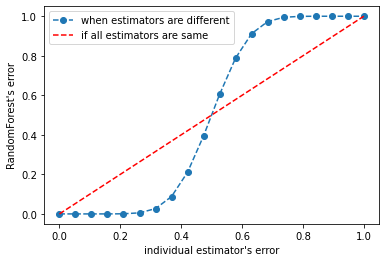

In [59]:
import numpy as np
x = np.linspace(0,1,20);
y = [];
for epsilon in np.linspace(0,1,20):
    error = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(error);
plt.plot(x,y,"o--",label = 'when estimators are different');
plt.plot(x,x,'--',color = 'red',label = 'if all estimators are same');
plt.xlabel("individual estimator's error");
plt.ylabel("RandomForest's error");
plt.legend()
plt.show()

# RandomForestRegressor
> 官网链接： https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

```python
class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None
                                        
```

所有参数、属性和接口都和随机森林回归器一致；仅有的不同就是回归树和分类树的不同
- criterion 参数不同 ： mse | friedman_mse | MAE 
- 模型的衡量指标不同 : 回归树默认是$R^2$，或者通过交叉验证可以选择 scoring = 'neg_mean_squared_error'  

In [60]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [61]:
boston = load_boston()

In [62]:
regressor = RandomForestRegressor(n_estimators = 60, random_state = 30) # 实例化
score = cross_val_score(regressor, boston.data , boston.target, cv = 10 , scoring = 'neg_mean_squared_error');

In [63]:
score

array([-10.7797012 ,  -5.35283502,  -5.09709248, -20.15408061,
       -12.23789074, -18.22866416,  -6.64649089, -95.88919233,
       -28.65043967, -13.64524133])

In [66]:
# sklearn中模型评估指标（打分）列表
import sklearn 
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

## 案例： 用随机森林回归填充缺失值
 可以考虑使用sklearn.impute.SimpleImputer 来填充平均值、中值或其他常用的数据到数据中
> 官网链接： https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer
 ```python
class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)
```

In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from  sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
%matplotlib inline

In [70]:
dataset = load_boston();

In [73]:
dataset.data.shape

(506, 13)

In [78]:
X_full ,Y_full = dataset.data, dataset.target
n_smaples = X_full.shape[0];
n_features = X_full.shape[1]

# 随机行索引，列索引
rng = np.random.RandomState(0);
missing_rate = 0.5
n_missing_samples = int(np.floor(n_smaples * n_features * missing_rate));
missing_features = rng.randint(0,n_features, n_missing_samples);
missing_samples = rng.randint(0,n_smaples,n_missing_samples);
# 将空值加入数组中
X_missing = X_full.copy();
Y_missing = Y_full.copy();
X_missing[missing_samples, missing_features] = np.nan

In [81]:
X_missing_tmp = pd.DataFrame(X_missing,columns = dataset.feature_names);
X_missing_tmp.isna().sum()

CRIM       200
ZN         201
INDUS      200
CHAS       203
NOX        202
RM         201
AGE        185
DIS        197
RAD        196
TAX        197
PTRATIO    204
B          214
LSTAT      189
dtype: int64

In [86]:
# 使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean');
X_missing_mean = imp_mean.fit_transform(X_missing);


In [84]:
X_missing

array([[       nan, 1.8000e+01,        nan, ...,        nan,        nan,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00,        nan, ...,        nan, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02,        nan, 7.0700e+00, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan, 1.1930e+01, ..., 2.1000e+01,        nan,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ...,        nan, 3.9690e+02,
        7.8800e+00]])

In [88]:
pd.DataFrame(X_missing_mean).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [89]:
# 使用0进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'constant',fill_value = 0);
X_missing_0 = imp_mean.fit_transform(X_missing);
X_missing_0

array([[0.0000e+00, 1.8000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 0.0000e+00,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 0.0000e+00, 3.9690e+02,
        7.8800e+00]])

In [116]:
X_missing_reg = X_missing_tmp.copy();
print(X_missing_reg.isna().sum())
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
# 返回： 从小到大的顺序所对应的索引
sortindex

CRIM       200
ZN         201
INDUS      200
CHAS       203
NOX        202
RM         201
AGE        185
DIS        197
RAD        196
TAX        197
PTRATIO    204
B          214
LSTAT      189
dtype: int64


array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11])

In [117]:
X_missing_reg

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


In [118]:
# 填补空值
for i in sortindex:
    df = X_missing_reg;
    fillc = df.iloc[:,i]; # 作为target
    df = pd.concat([df.iloc[:,df.columns != df.columns[i]],pd.DataFrame(Y_full)],axis = 1); # 将剩余特征与target组合形成训练集
    df_0 = SimpleImputer(missing_values = np.nan, strategy = 'constant',fill_value = 0).fit_transform(df);  # 将训练集中的缺失值补充为0
    Ytrain = fillc[fillc.notnull()]; # 划分训练集和测试集
    Ytest = fillc[fillc.isnull()];
    Xtrain = df_0[Ytrain.index,:]; # 已经是数组了
    Xtest = df_0[Ytest.index,:];
    rfc = RandomForestRegressor(n_estimators = 100);
    rfc = rfc.fit(Xtrain,Ytrain);
    Ypredict = rfc.predict(Xtest);
    X_missing_reg.iloc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict;
    print('-------------');
    print(X_missing_reg.isna().sum())

-------------
CRIM       200
ZN         201
INDUS      200
CHAS       203
NOX        202
RM         201
AGE          0
DIS        197
RAD        196
TAX        197
PTRATIO    204
B          214
LSTAT      189
dtype: int64
-------------
CRIM       200
ZN         201
INDUS      200
CHAS       203
NOX        202
RM         201
AGE          0
DIS        197
RAD        196
TAX        197
PTRATIO    204
B          214
LSTAT        0
dtype: int64
-------------
CRIM       200
ZN         201
INDUS      200
CHAS       203
NOX        202
RM         201
AGE          0
DIS        197
RAD          0
TAX        197
PTRATIO    204
B          214
LSTAT        0
dtype: int64
-------------
CRIM       200
ZN         201
INDUS      200
CHAS       203
NOX        202
RM         201
AGE          0
DIS          0
RAD          0
TAX        197
PTRATIO    204
B          214
LSTAT        0
dtype: int64
-------------
CRIM       200
ZN         201
INDUS      200
CHAS       203
NOX        202
RM         201
AGE     

In [119]:
X_missing_reg.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [120]:
X = [X_full, X_missing_mean, X_missing_0, X_missing_reg];
mse = [];
for x in X:
    estimator = RandomForestRegressor(random_state = 0, n_estimators = 100);
    scores = cross_val_score(estimator, x, Y_full, scoring = 'neg_mean_squared_error', cv = 10).mean();
    mse.append(scores * -1)
print(mse)

[21.765896304705873, 41.18311751078433, 45.18233433407843, 18.356951010901955]


In [132]:
[*zip(['full_data'
           ,'Zero imputation'
           ,'Mean imputation'
           ,'Regressor Imputation'],mse)]

[('full_data', 21.765896304705873),
 ('Zero imputation', 41.18311751078433),
 ('Mean imputation', 45.18233433407843),
 ('Regressor Imputation', 18.356951010901955)]

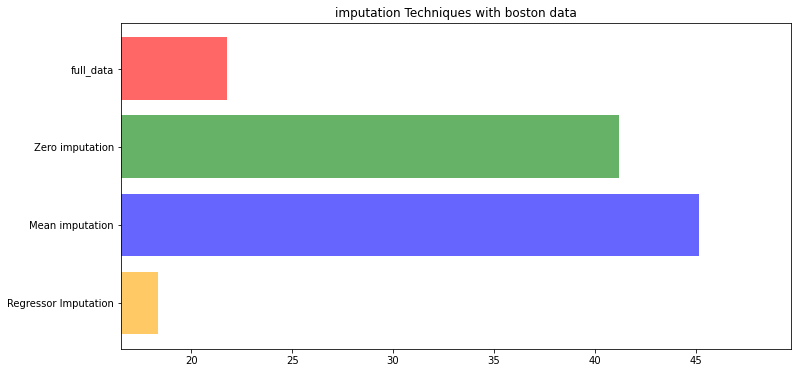

In [142]:
# 可视化
X_labels = ['full_data'
           ,'Zero imputation'
           ,'Mean imputation'
           ,'Regressor Imputation'];
colors = ['r','g','b','orange'];
plt.figure(figsize = (12,6));
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i,mse[i],color = colors[i], alpha = 0.6, align = 'center');
ax.set_title("imputation Techniques with boston data");
ax.set_xlim(left = min(mse) * 0.9, right = max(mse)*1.1);
ax.set_yticks(np.arange(len(mse)));
ax.invert_yaxis();
ax.set_yticklabels(X_labels);
plt.show()

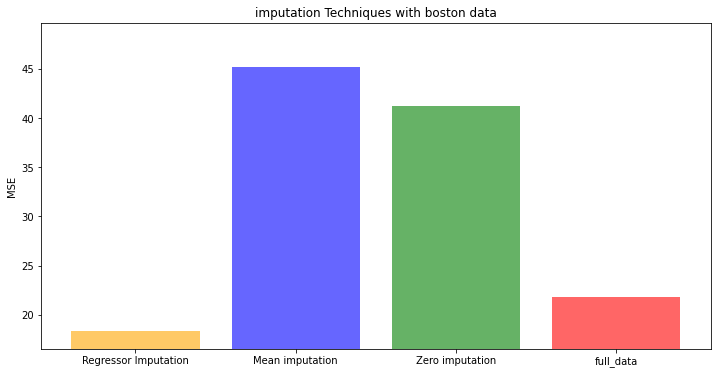

In [140]:
# 可视化
X_labels = ['full_data'
           ,'Zero imputation'
           ,'Mean imputation'
           ,'Regressor Imputation'];
colors = ['r','g','b','orange'];
plt.figure(figsize = (12,6));
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.bar(i,mse[i],color = colors[i], alpha = 0.6, align = 'center');
ax.set_title("imputation Techniques with boston data");
ax.set_ylim(bottom = min(mse) * 0.9, top = max(mse)*1.1);
ax.set_xticks(np.arange(len(mse)));
ax.set_ylabel("MSE")
ax.invert_xaxis();
ax.set_xticklabels(X_labels);
plt.show()

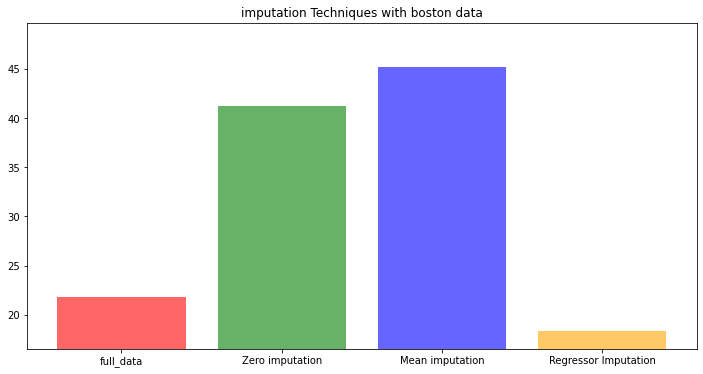

In [139]:
# 可视化
X_labels = ['full_data'
           ,'Zero imputation'
           ,'Mean imputation'
           ,'Regressor Imputation'];
colors = ['r','g','b','orange'];
plt.figure(figsize = (12,6));
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.bar(i,mse[i],color = colors[i], alpha = 0.6, align = 'center');
ax.set_title("imputation Techniques with boston data");
ax.set_ylim(bottom = min(mse) * 0.9, top = max(mse)*1.1);
ax.set_xticks(np.arange(len(mse)));
ax.set_xticklabels(X_labels);
plt.show()

## 随机森林在乳腺癌数据上的调参

In [143]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [145]:
# 导入数据集
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [146]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [147]:
data.data.shape

(569, 30)

In [148]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [149]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [151]:
# 实例化
rfc = RandomForestClassifier(n_estimators = 60, random_state = 90);
score_pre = cross_val_score(rfc, data.data, data.target, cv = 10).mean();
print(round(score_pre,4))

0.9614


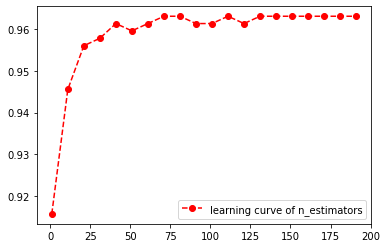

In [155]:
# 学习曲线，n_estimators
scorel = [];
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators = i+1, random_state = 90);
    score_pre = cross_val_score(rfc, data.data, data.target, cv = 10).mean();
    scorel.append(score_pre);
plt.plot(range(1,201,10),scorel,'o--', color = 'red',label = 'learning curve of n_estimators');
plt.legend();
plt.show()

In [157]:
print(max(scorel),(scorel.index(max(scorel))*10+1))

0.9631265664160402 71


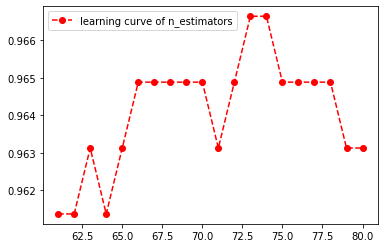

0.9631265664160402 71


In [158]:
# 学习曲线，n_estimators
scorel_v2 = [];
for i in range(60,80,1):
    rfc = RandomForestClassifier(n_estimators = i+1, random_state = 90);
    score_pre = cross_val_score(rfc, data.data, data.target, cv = 10).mean();
    scorel_v2.append(score_pre);
plt.plot(range(61,81,1),scorel_v2,'o--', color = 'red',label = 'learning curve of n_estimators');
plt.legend();
plt.show();

In [166]:
print(max(scorel_v2),([*range(60,80,1)][scorel_v2.index(max(scorel_v2))]))

0.9666353383458647 72


In [168]:
# 某些参数可以先跑学习曲线，缩小范围，再用网格搜索
param_grid = {
     'criterion' : ['gini','entropy']
    ,'max_depth' : range(10,20,1)
};
rfc = RandomForestClassifier(n_estimators = 72, random_state = 90);
GC = GridSearchCV(rfc, param_grid, cv = 10);
GC = GC.fit(data.data, data.target);

In [169]:
GC.best_params_ # 调整出来的最佳参数

{'criterion': 'gini', 'max_depth': 10}

In [170]:
GC.best_score_ # 最好的准确率

0.9648809523809524

In [171]:
# 网格搜索
'''
max_features是能够既将模型往左（低方差高偏差）推，又能将模型往右（高方差低偏差）推的参数
max_features的默认最小值为sqrt(n_features)
'''
param_grid = {
     'max_features' : np.arange(5,30,1)
};
rfc = RandomForestClassifier(n_estimators = 72, random_state = 90, max_depth = 10, criterion = 'gini');
GC = GridSearchCV(rfc, param_grid, cv = 10);
GC = GC.fit(data.data, data.target);

In [172]:
GC.best_params_ # 调整出来的最佳参数

{'max_features': 28}

In [173]:
GC.best_score_ # 最好的准确率

0.968421052631579

In [174]:
 #调整min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20 
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围 
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_score_

0.9613721804511279

In [175]:
GS.best_params_

{'min_samples_leaf': 4}